In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def f(x):
    #return (a-3)*(a-5)*(a-7)+85
    return 1 + x**3 + np.sin(50.*x)

In [52]:
x = np.linspace(0, 10, 400)
y = f(x)

In [53]:
a, b = 0., 2.                     # define os limnites de integração

ndiv = 100                        # numero de intervalos a serem utilizados
xint = np.linspace(a,b,ndiv)    # cria um vetor com ndiv elementos entre os limites de integração
yint = f(xint)                  # calcula o valor da função nos pontos do vetor acima


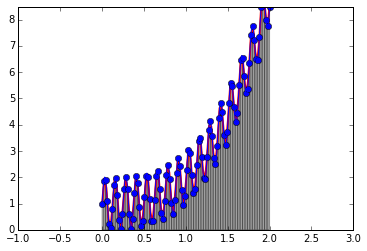

In [54]:
 plt.plot(x, y, lw=2,color='r')
plt.axis([a-1, b+1, 0, max([f(a),f(b)])])
plt.plot(xint,yint,'bo')


for i in range(ndiv-1):
    xfit = np.array([xint[i],(xint[i]+xint[i+1])/2,xint[i+1]])
    yfit = f(xfit)

    # calculate polynomial
    z = np.polyfit(xfit, yfit, 2)
    #print("Fit coeficients", z)
    fit = np.poly1d(z)
    xnew = np.linspace(xfit[0], xfit[2], 50)
    ynew = fit(xnew)
    
    plt.plot(xnew,ynew,color='b')
    plt.fill_between(xnew, 0, ynew, facecolor='gray', alpha=0.4)

In [55]:
from scipy.integrate import quad, trapz, simps
integral, error = quad(f, a, b)
print("Integral por quadratura:", integral, "+/-", error)

print("Integral usando ", len(xint), "trapezoides:", trapz(yint, xint))
print("erro relativo:",(integral-trapz(yint, xint))/integral)

print("Integral usando Simpson", simps(yint, xint))
print("erro relativo:",(integral-simps(yint, xint))/integral)

('Integral por quadratura:', 6.002753622554247, '+/-', 1.917556928130934e-10)
('Integral usando ', 100, 'trapezoides:', 6.0029235358789599)
('erro relativo:', -2.8305896826226489e-05)
('Integral usando Simpson', 6.003114979663227)
('erro relativo:', -6.019855747913912e-05)


## Exercícios

Exercício 1: Escreva uma função em python que calcule a integral pelo método de Simpson, da mesma maneira que foi feito para o método dos trapézios. Com essa função calcule a integrais da função abaixo:

$$b)~f_2(x) = 1 + x^3 + \sin(kx)~~~com~a=0~e~b=2$$
  
  onde $k$ é um parametro que para este exercício deve ser adotado como $k=50$.
  
  - Faça uma análise dos erros cometidos a medida que se aumenta o numero de intervalos na integração da função acima no intervalo [0,2]. Para o numero de intervalos utilize a seginte sequencia: 
  
  [2, 4, 6, 8, 10, 20, 40, 80, 100,200, 300, 600, 1000, 2000]
  
  Utilize gráficos para mostrar seus resultados.